# Normal Density Recovery using Fast Fourier Transform (FFT)

## Theory and Concept

This notebook demonstrates the recovery of a probability density function (PDF) from its characteristic function using the Fast Fourier Transform (FFT) method. The specific example used here is the normal (Gaussian) distribution, but the method can be applied to other distributions as well.

### Characteristic Function

The characteristic function of a random variable $X$ is defined as:

$\phi_X(u) = E[e^{iuX}] = \int_{-\infty}^{\infty} e^{iux} f_X(x) dx$

where $f_X(x)$ is the probability density function of $X$.

For a normal distribution with mean $\mu$ and standard deviation $\sigma$, the characteristic function is:

$\phi_X(u) = e^{iu\mu - \frac{1}{2}\sigma^2u^2}$

### Density Recovery

To recover the density function from the characteristic function, we use the inverse Fourier transform:

$f_X(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{-iux} \phi_X(u) du$

In practice, we approximate this integral using the discrete Fourier transform (DFT), which is efficiently computed using the Fast Fourier Transform (FFT) algorithm.

## Implementation Steps

1. **Define the grid**: Create a grid for both the frequency domain (u) and the spatial domain (x).
2. **Compute the characteristic function**: Calculate $\phi_X(u)$ for the given distribution.
3. **Apply FFT**: Use the FFT algorithm to compute the inverse Fourier transform.
4. **Post-processing**: Scale and interpolate the results to obtain the final density estimate.

## Code Explanation

Let's break down the `RecoveryDensity` function:


In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as st
import scipy.fft as fft
import scipy.interpolate as interpolate

In [18]:
def RecoveryDensity(cf,x,N=8192):
    i=np.sqrt(-1)
    #grid
    u_max=20.0
    du=u_max/N
    u=np.linspace(0,N-1,N)*du
    # GRID FOR X
    b=np.min(x)
    dx=2.0*np.pi/(N*du)
    x_i=b+np.linspace(0,N-1,N)*dx
    # shift varivale phi
    phi=np.exp(-i*b*u)*cf(u)
    #bondary value
    gamma_1=np.exp(-i*x_i*u[0])*cf(u[0])
    gamma_2=np.exp(-i*x_i*u[-1])*cf(u[-1])
    phi_boundary = 0.5 * (gamma_1 + gamma_2)
    # density calibation of fft
    f_xi=du/np.pi*np.real(fft.fft(phi)-phi_boundary)
    # interoplation of complete grid of xi onto grid x
    f_xiInterp=interpolate.interp1d(x_i,f_xi,kind='cubic')
    return f_xiInterp(x)
    


### Key Steps:

1. **Grid definition**: We create grids for both u and x. The u grid goes from 0 to u_max, while the x grid is centered around the desired output range.

2. **Characteristic function calculation**: The input `cf` function is used to compute the characteristic function values.

3. **Shifting**: We apply a shift to account for the minimum x value, which helps improve accuracy.

4. **Boundary correction**: We compute boundary values to reduce edge effects in the FFT.

5. **FFT application**: The core of the method, where we use `fft.fft` to compute the inverse Fourier transform.

6. **Interpolation**: Finally, we interpolate the results onto the desired x grid.

## Changing Parameters

To modify the behavior of the density recovery, you can adjust the following parameters:

1. **N**: Increase for higher resolution (but slower computation).
2. **u_max**: Adjust the maximum frequency considered.
3. **Interpolation method**: Change `kind='cubic'` to other options like 'linear' or 'quadratic'.

In the `mainCalculator` function, you can modify:

1. **mu** and **sigma**: Change these to alter the normal distribution parameters.
2. **x range**: Modify the `np.linspace(-8.0, 8.0, 100)` to change the x-axis range and number of points.

## Example


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2636\3849726949.py:2: RuntimeWarning: invalid value encountered in sqrt
  i=np.sqrt(-1)#i=sqrt(-1)


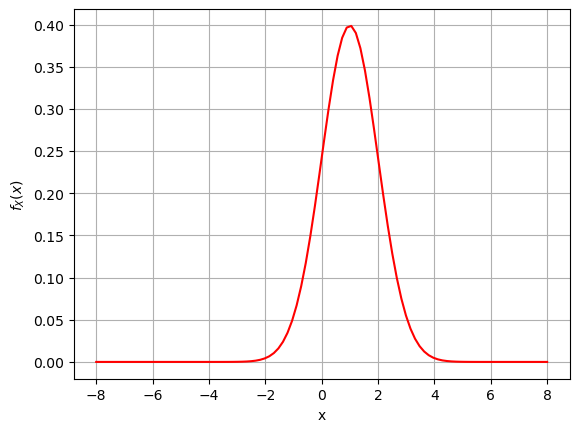

In [22]:
def mainCalculator():
    i=np.sqrt(-1)#i=sqrt(-1)
    mu=1.0
    sigma=1.0
    # deifning caharateristic function of normal distribution 
    cF=lambda u: np.exp(i*mu*u-0.5*sigma**2.0*u**2.0)
    x=np.linspace(-8.0,8.0,100)
    f_XExact=st.norm.pdf(x,mu,sigma)
    f_XR=RecoveryDensity(cF,x,2**8)
    plt.figure(1)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("$f_X(x)$")
    plt.plot(x,f_XExact,'-r')
    plt.plot(x,f_XR,'--b')
mainCalculator()


This example demonstrates the recovery of a normal distribution with μ=1 and σ=1. You can modify these parameters to see how well the method works for different distributions.

# Normal Density Recovery using Fast Fourier Transform (FFT)

## Theory and Concept

This notebook demonstrates the recovery of a probability density function (PDF) from its characteristic function using the Fast Fourier Transform (FFT) method. The specific example used here is the normal (Gaussian) distribution, but the method can be applied to other distributions as well.

### Characteristic Function

The characteristic function of a random variable $X$ is defined as:

$\phi_X(u) = E[e^{iuX}] = \int_{-\infty}^{\infty} e^{iux} f_X(x) dx$

where $f_X(x)$ is the probability density function of $X$.

For a normal distribution with mean $\mu$ and standard deviation $\sigma$, the characteristic function is:

$\phi_X(u) = e^{iu\mu - \frac{1}{2}\sigma^2u^2}$

### Density Recovery

To recover the density function from the characteristic function, we use the inverse Fourier transform:

$f_X(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{-iux} \phi_X(u) du$

In practice, we approximate this integral using the discrete Fourier transform (DFT), which is efficiently computed using the Fast Fourier Transform (FFT) algorithm.

## Implementation Steps

1. **Define the grid**: Create a grid for both the frequency domain (u) and the spatial domain (x).
2. **Compute the characteristic function**: Calculate $\phi_X(u)$ for the given distribution.
3. **Apply FFT**: Use the FFT algorithm to compute the inverse Fourier transform.
4. **Post-processing**: Scale and interpolate the results to obtain the final density estimate.

## Code Explanation

Let's break down the `RecoveryDensity` function:


In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as st
import scipy.fft as fft
import scipy.interpolate as interpolate

In [18]:
def RecoveryDensity(cf,x,N=8192):
    i=np.sqrt(-1)
    #grid
    u_max=20.0
    du=u_max/N
    u=np.linspace(0,N-1,N)*du
    # GRID FOR X
    b=np.min(x)
    dx=2.0*np.pi/(N*du)
    x_i=b+np.linspace(0,N-1,N)*dx
    # shift varivale phi
    phi=np.exp(-i*b*u)*cf(u)
    #bondary value
    gamma_1=np.exp(-i*x_i*u[0])*cf(u[0])
    gamma_2=np.exp(-i*x_i*u[-1])*cf(u[-1])
    phi_boundary = 0.5 * (gamma_1 + gamma_2)
    # density calibation of fft
    f_xi=du/np.pi*np.real(fft.fft(phi)-phi_boundary)
    # interoplation of complete grid of xi onto grid x
    f_xiInterp=interpolate.interp1d(x_i,f_xi,kind='cubic')
    return f_xiInterp(x)
    


### Key Steps:

1. **Grid definition**: We create grids for both u and x. The u grid goes from 0 to u_max, while the x grid is centered around the desired output range.

2. **Characteristic function calculation**: The input `cf` function is used to compute the characteristic function values.

3. **Shifting**: We apply a shift to account for the minimum x value, which helps improve accuracy.

4. **Boundary correction**: We compute boundary values to reduce edge effects in the FFT.

5. **FFT application**: The core of the method, where we use `fft.fft` to compute the inverse Fourier transform.

6. **Interpolation**: Finally, we interpolate the results onto the desired x grid.

## Changing Parameters

To modify the behavior of the density recovery, you can adjust the following parameters:

1. **N**: Increase for higher resolution (but slower computation).
2. **u_max**: Adjust the maximum frequency considered.
3. **Interpolation method**: Change `kind='cubic'` to other options like 'linear' or 'quadratic'.

In the `mainCalculator` function, you can modify:

1. **mu** and **sigma**: Change these to alter the normal distribution parameters.
2. **x range**: Modify the `np.linspace(-8.0, 8.0, 100)` to change the x-axis range and number of points.

## Example


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2636\3849726949.py:2: RuntimeWarning: invalid value encountered in sqrt
  i=np.sqrt(-1)#i=sqrt(-1)


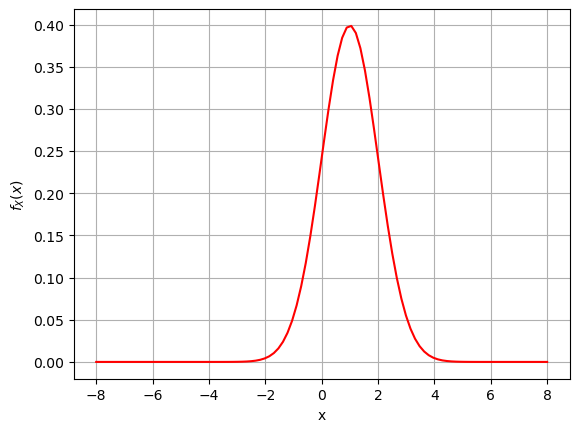

In [22]:
def mainCalculator():
    i=np.sqrt(-1)#i=sqrt(-1)
    mu=1.0
    sigma=1.0
    # deifning caharateristic function of normal distribution 
    cF=lambda u: np.exp(i*mu*u-0.5*sigma**2.0*u**2.0)
    x=np.linspace(-8.0,8.0,100)
    f_XExact=st.norm.pdf(x,mu,sigma)
    f_XR=RecoveryDensity(cF,x,2**8)
    plt.figure(1)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("$f_X(x)$")
    plt.plot(x,f_XExact,'-r')
    plt.plot(x,f_XR,'--b')
mainCalculator()


This example demonstrates the recovery of a normal distribution with μ=1 and σ=1. You can modify these parameters to see how well the method works for different distributions.